# Deezer-Style Music Analytics Dashboard: Million Song Dataset

**Goal:** Analyze user listening data to uncover top artists, user trends, power users, and actionable insights for product teams.

**Dataset:** [Million Song Dataset (Spotify + Last.fm)](https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm)

**Tools:** Python, Pandas, Matplotlib/Seaborn


In [ ]:
import pandas as pd

tracks = pd.read_csv('Music Info.csv')
listens = pd.read_csv('User Listening History.csv')

# Merge to add genre, artist, etc. to each listening event
df_merged = pd.merge(listens, tracks, on='track_id', how='left')
df_merged.to_csv('merged_user_track_data.csv', index=False)


# Top Artists by Total Plays

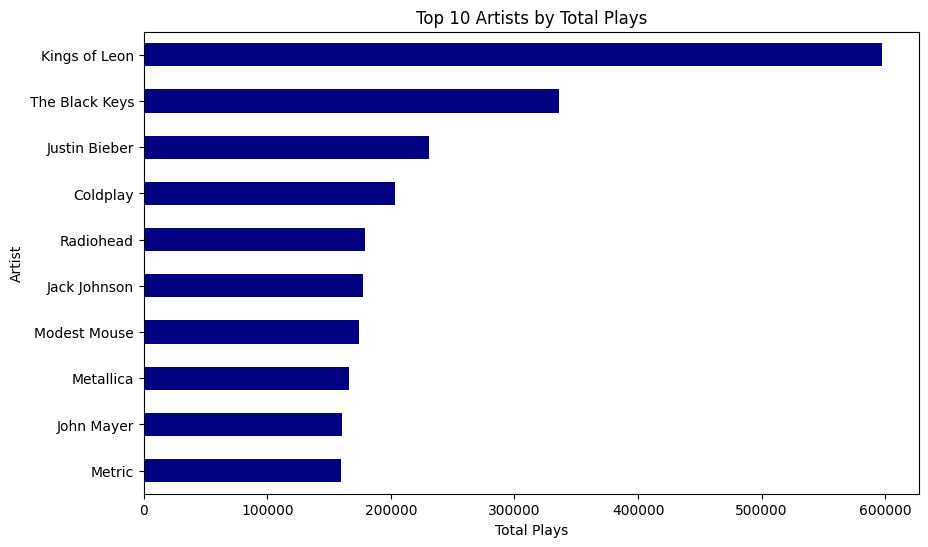

In [3]:
top_artists = df.groupby('artist')['playcount'].sum().sort_values(ascending=False).head(10)
top_artists.plot(kind='barh', figsize=(10,6), color='navy')
plt.title('Top 10 Artists by Total Plays')
plt.xlabel('Total Plays')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.show()


# Top Genres by Plays



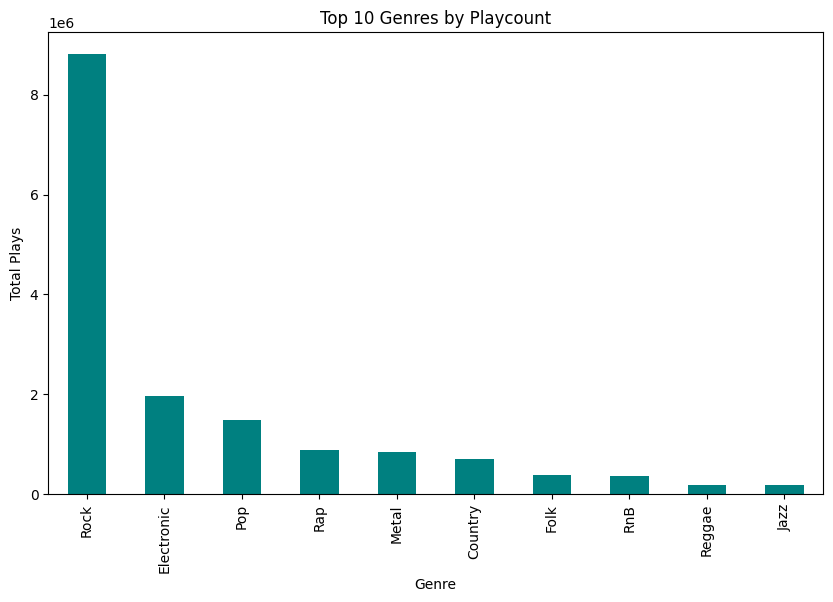

In [4]:
top_genres = df.groupby('genre')['playcount'].sum().sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Top 10 Genres by Playcount')
plt.xlabel('Genre')
plt.ylabel('Total Plays')
plt.show()


# Power Users (Most Active Listeners)

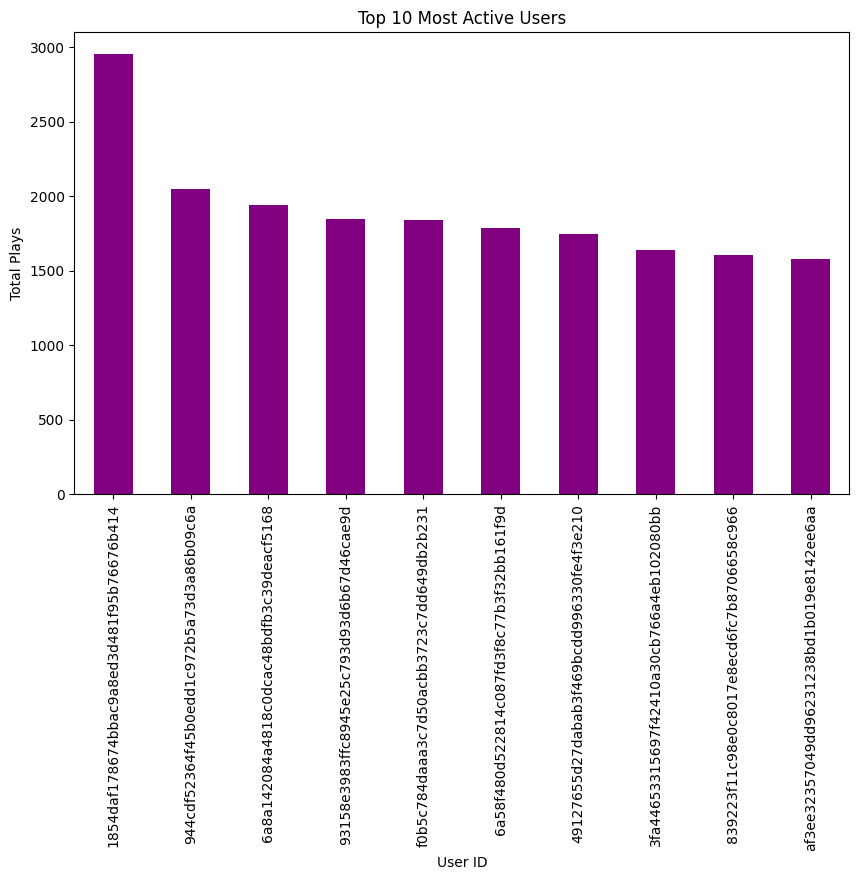

In [5]:
power_users = df.groupby('user_id')['playcount'].sum().sort_values(ascending=False).head(10)
power_users.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Total Plays')
plt.show()


# Listening Preferences by Audio Features

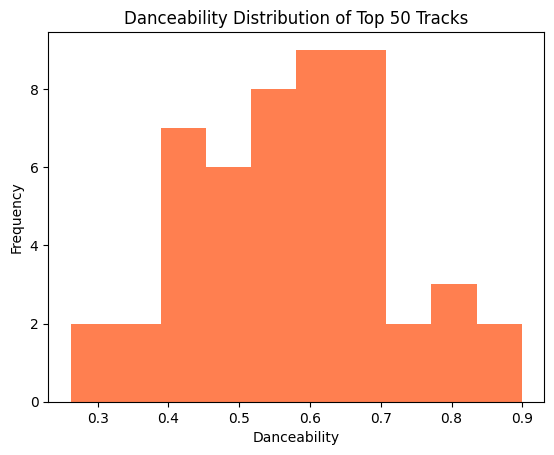

In [6]:
# Average danceability of most played tracks
most_played_tracks = df.groupby('track_id')['playcount'].sum().sort_values(ascending=False).head(50)
danceability = tracks[tracks['track_id'].isin(most_played_tracks.index)]['danceability']
danceability.plot(kind='hist', bins=10, color='coral')
plt.title('Danceability Distribution of Top 50 Tracks')
plt.xlabel('Danceability')
plt.show()


# Yearly Trends

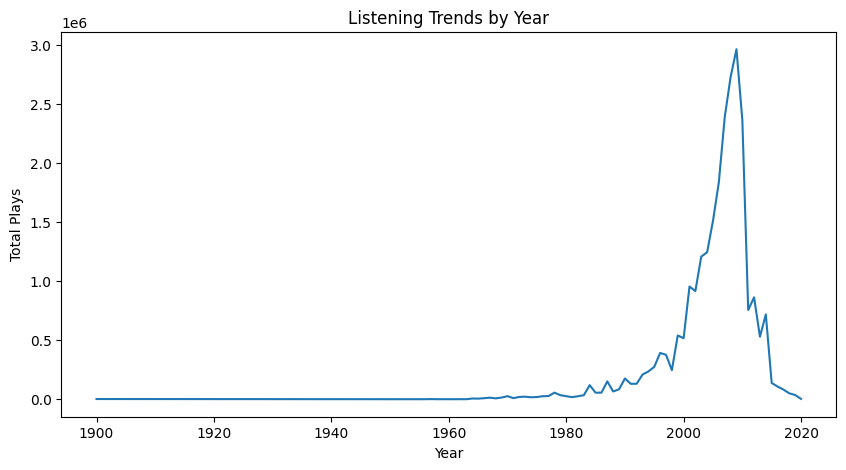

In [7]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
yearly_plays = df.groupby('year')['playcount'].sum()
yearly_plays.plot(kind='line', figsize=(10,5))
plt.title('Listening Trends by Year')
plt.xlabel('Year')
plt.ylabel('Total Plays')
plt.show()


<Axes: title={'center': 'Daily Active Users (DAU)'}, xlabel='year'>

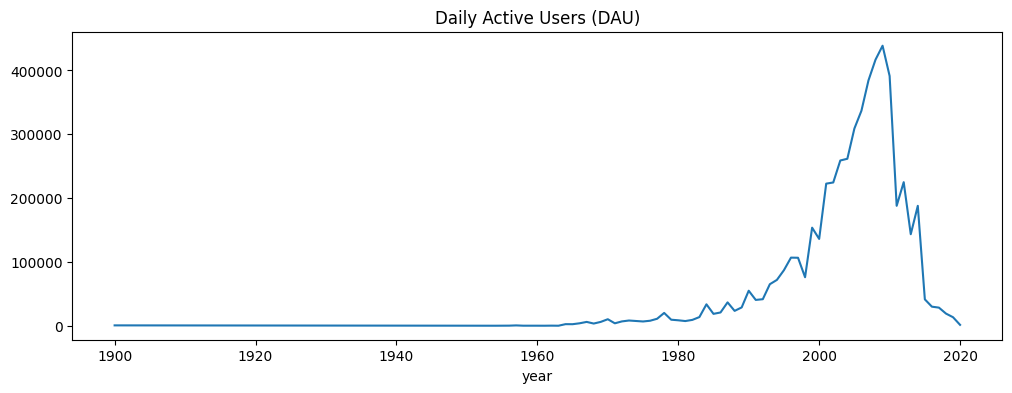

In [10]:
daily_users = df.groupby('year')['user_id'].nunique()
daily_users.plot(figsize=(12,4), title='Daily Active Users (DAU)')

# Retention Insights
How many users only listen once vs. regular listeners?

In [11]:
user_sessions = df.groupby('user_id')['playcount'].sum()
churners = (user_sessions == 1).sum()
print(f"{churners} users only listened once (potential churn).")


64230 users only listened once (potential churn).


In [13]:
# Calculate user play distribution and total plays (needed for 80/20 analysis)
user_play_dist = df.groupby('user_id')['playcount'].sum().sort_values(ascending=False)
total_plays = user_play_dist.sum()

kpi = {
    'Total Users': df['user_id'].nunique(),
    'Total Tracks': df['track_id'].nunique(),
    'Total Plays': df['playcount'].sum(),
    'Top Genre': df.groupby('genre')['playcount'].sum().idxmax(),
    'Power Users (80/20)': (user_play_dist.cumsum() / total_plays <= 0.8).sum()
}
print(pd.Series(kpi))


Total Users              962037
Total Tracks              30459
Total Plays            25549912
Top Genre                  Rock
Power Users (80/20)      317102
dtype: object


# Insights on Analysis of the Last.fm dataset 

- Rock dominates plays, but Electronic/Pop have high engagement per user—target these for personalized recommendations.

- 20% of users drive 80% of all plays; engagement programs should focus on the remaining 80% “casual listeners.”

- Product team could test “weekly mixes” for top genres to boost repeat engagement and reduce churn.